In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import cartopy.crs as ccrs
import seaborn as sns
import re
from datetime import datetime

### create sqlite database

In [2]:
filename = 'buoy_data.sqlite.db'

In [3]:
def create_sqldb(filename):
    conn = sqlite3.connect(filename, timeout=10)
    print("SQLite : Opened database successfully")
    c = conn.cursor()
    c.execute('''CREATE TABLE IF NOT EXISTS status
       (ST        TEXT  NOT NULL,
        DATETIME  TEXT  NOT NULL,
        H         TEXT,
        Hs        TEXT,
        T         TEXT,
        Tmean     TEXT,
        D         TEXT,
        P         TEXT,
        Temp      TEXT,
        Zt        TEXT,
        Vm        TEXT,
        Dm        TEXT,
        Vg        TEXT,
        Vms       TEXT,
        Vgs       TEXT,
        Zv        TEXT,
        QC        TEXT,
        Hsat      TEXT,
        Tsat      TEXT,
        Vmsat     TEXT);
        ''')
    print("SQLite : Table created successfully")
    c.execute('CREATE UNIQUE INDEX IF NOT EXISTS index_unique ON status (ST,DATETIME)')
    conn.commit()
    conn.close()

In [4]:
def read_sql(filename):
    conn = sqlite3.connect(filename, timeout=10)
    df = pd.read_sql("SELECT * FROM status",con=conn)
    conn.close()
    return df

In [5]:
def write_sql(str1,str2,data):
    conn = sqlite3.connect(filename, timeout=10)
    c = conn.cursor()
    c.execute("INSERT OR REPLACE INTO status(%s) VALUES (%s)" % (str1,str2),data)
    conn.commit()
    conn.close()

#### read in raw data

In [6]:
# data path 
path = './data'

# walk around to look for local txt files
wavefiles = []
for dirpath, subdirs, files in os.walk(path):
    for x in files:
        if x.endswith("wave.txt") :
            wavefiles.append(os.path.join(dirpath, x))

# walk around to look for local txt files 
windfiles = []
for dirpath, subdirs, files in os.walk(path):
    for x in files:
        if x.endswith("wind.txt") :
            windfiles.append(os.path.join(dirpath, x))
            
# walk around to look for local txt files 
temp1files = []
for dirpath, subdirs, files in os.walk(path):
    for x in files:
        if x.endswith("s_stemp1.txt") :
            temp1files.append(os.path.join(dirpath, x))
            
# walk around to look for local txt files 
pres1files = []
for dirpath, subdirs, files in os.walk(path):
    for x in files:
        if x.endswith("p_pres1.txt") :
            pres1files.append(os.path.join(dirpath, x))

In [7]:
wavefiles, windfiles, temp1files, pres1files

(['./data/20100101w_wave.txt',
  './data/20150101w_wave.txt',
  './data/20170101w_wave.txt',
  './data/20040101w_wave.txt',
  './data/20130101w_wave.txt',
  './data/20030101w_wave.txt',
  './data/20090101w_wave.txt',
  './data/20000101w_wave.txt',
  './data/20070101w_wave.txt',
  './data/20110101w_wave.txt',
  './data/20160101w_wave.txt',
  './data/20050101w_wave.txt',
  './data/20020101w_wave.txt',
  './data/20120101w_wave.txt',
  './data/20080101w_wave.txt',
  './data/20010101w_wave.txt',
  './data/20190101w_wave.txt',
  './data/20180101w_wave.txt',
  './data/20060101w_wave.txt'],
 ['./data/20050101v_wind.txt',
  './data/20060101v_wind.txt',
  './data/20030101v_wind.txt',
  './data/20170101v_wind.txt',
  './data/20000101v_wind.txt',
  './data/20040101v_wind.txt',
  './data/20090101v_wind.txt',
  './data/20120101v_wind.txt',
  './data/20180101v_wind.txt',
  './data/20150101v_wind.txt',
  './data/20110101v_wind.txt',
  './data/20010101v_wind.txt',
  './data/20160101v_wind.txt',
  './da

In [8]:
def read_windfile(filename):
    #read files
    fh = open(filename,'r')
    _lines = fh.readlines()
    fh.close()

    # extract data
    tmp=[]
    pattern = r"[a-zA-Z0-9][a-zA-Z0-9][a-zA-Z0-9]"
    for line in _lines:
        if re.match(pattern, line) and line[0:4] != 'yyyy':
            tmp.append(line.strip().split())

    # set up column names
    columns = ['ST', 'DATETIME','Zv','Vm','Dm','Vg','Vms','Vgs','QC']
        
    # list to DataFrame 
    df = pd.DataFrame(data=tmp,columns=columns)
    df = df[df['QC']=='Q'] 

    return df

In [19]:
def read_wavefile(filename):
    #read files
    fh = open(filename,'r')
    _lines = fh.readlines()
    fh.close()

    # extract data
    tmp=[]
    pattern = r"[a-zA-Z0-9][a-zA-Z0-9][a-zA-Z0-9]"
    for line in _lines:
        if re.match(pattern, line) and line[0:4] != 'yyyy':
            tmp.append(line.strip().split())

    if int(filename.lstrip(path)[0:4]) >= 2015:
        # set up column names
        columns = ['ST', 'DATETIME','H','T','Tmean','D','QC']
    elif int(filename.lstrip(path)[0:4]) == 2000:
        columns = ['ST', 'DATETIME','H','Hs','T','Tmean','QC']
    else:
        columns = ['ST', 'DATETIME','H','Hs','T','Tmean','D','QC']
        
    # list to DataFrame 
    df = pd.DataFrame(data=tmp,columns=columns)
    df = df[df['QC']=='Q']
   
    return df

In [10]:
def read_tempfile(filename):
    #read files
    fh = open(filename,'r')
    _lines = fh.readlines()
    fh.close()

    # extract data
    tmp=[]
    pattern = r"[a-zA-Z0-9][a-zA-Z0-9][a-zA-Z0-9]"
    for line in _lines:
        if re.match(pattern, line) and line[0:4] != 'yyyy':
            tmp.append(line.strip().split())

    columns = ['ST', 'DATETIME','Zt','Temp','QC']
        
    # list to DataFrame 
    df = pd.DataFrame(data=tmp,columns=columns)
    df = df[df['QC']=='Q']
   
    return df

In [11]:
def read_presfile(filename):
    #read files
    fh = open(filename,'r')
    _lines = fh.readlines()
    fh.close()

    # extract data
    tmp=[]
    pattern = r"[a-zA-Z0-9][a-zA-Z0-9][a-zA-Z0-9]"
    for line in _lines:
        if re.match(pattern, line) and line[0:4] != 'yyyy':
            tmp.append(line.strip().split())

    columns = ['ST', 'DATETIME','P','QC']
        
    # list to DataFrame 
    df = pd.DataFrame(data=tmp,columns=columns)
    df = df[df['QC']=='Q']
   
    return df

In [12]:
def convert_big52utf8(filename):
    fh = open(filename,'r',encoding="big5")
    _lines = fh.readlines()
    fh.close()
    _lines

    filename=filename+'.utf8'
    fh = open(filename,'w',encoding="utf-8")
    fh.writelines(_lines)
    fh.close()

In [ ]:
# convert file format from big5 to utf8 if necessary
#convert_big52utf8(filename)

In [13]:
# read in data
#filename='./20140101v_wind.txt'
def read_file(filename):
    fh = open(filename,'r')
    _lines = fh.readlines()
    fh.close()

    # extract data
    tmp=[]
    pattern = r"[a-zA-Z0-9][a-zA-Z0-9][a-zA-Z0-9]"
    for line in _lines:
        if re.match(pattern, line) and line[0:4] != 'yyyy':
            tmp.append(line.strip().split())
        

In [15]:
filename='./data/20150101p_pres1.txt'
read_file(filename)

In [20]:
wavedata = {}
for f,file in enumerate(wavefiles):
    print(file)
    df = read_wavefile(file)
    wavedata[f] = df.loc[:, ~df.columns.str.contains('^Unnamed')]


./data/20100101w_wave.txt
./data/20150101w_wave.txt
./data/20170101w_wave.txt
./data/20040101w_wave.txt
./data/20130101w_wave.txt
./data/20030101w_wave.txt
./data/20090101w_wave.txt
./data/20000101w_wave.txt
./data/20070101w_wave.txt
./data/20110101w_wave.txt
./data/20160101w_wave.txt
./data/20050101w_wave.txt
./data/20020101w_wave.txt
./data/20120101w_wave.txt
./data/20080101w_wave.txt
./data/20010101w_wave.txt
./data/20190101w_wave.txt
./data/20180101w_wave.txt
./data/20060101w_wave.txt


In [21]:
winddata = {}
for f,file in enumerate(windfiles):
    print(file)
    df = read_windfile(file)
    winddata[f] = df.loc[:, ~df.columns.str.contains('^Unnamed')]


./data/20050101v_wind.txt
./data/20060101v_wind.txt
./data/20030101v_wind.txt
./data/20170101v_wind.txt
./data/20000101v_wind.txt
./data/20040101v_wind.txt
./data/20090101v_wind.txt
./data/20120101v_wind.txt
./data/20180101v_wind.txt
./data/20150101v_wind.txt
./data/20110101v_wind.txt
./data/20010101v_wind.txt
./data/20160101v_wind.txt
./data/20130101v_wind.txt
./data/20070101v_wind.txt
./data/20190101v_wind.txt
./data/20080101v_wind.txt
./data/20100101v_wind.txt
./data/20020101v_wind.txt
./data/20140101v_wind.txt


In [22]:
tempdata = {}
for f,file in enumerate(temp1files):
    print(file)
    df = read_tempfile(file)
    tempdata[f] = df.loc[:, ~df.columns.str.contains('^Unnamed')]

./data/20080101s_stemp1.txt
./data/20190101s_stemp1.txt
./data/20130101s_stemp1.txt
./data/20090101s_stemp1.txt
./data/20180101s_stemp1.txt
./data/20020101s_stemp1.txt
./data/20160101s_stemp1.txt
./data/20040101s_stemp1.txt
./data/20170101s_stemp1.txt
./data/20010101s_stemp1.txt
./data/20000101s_stemp1.txt
./data/20140101s_stemp1.txt
./data/20060101s_stemp1.txt
./data/20110101s_stemp1.txt
./data/20070101s_stemp1.txt
./data/20100101s_stemp1.txt
./data/20030101s_stemp1.txt
./data/20050101s_stemp1.txt
./data/20150101s_stemp1.txt
./data/20120101s_stemp1.txt


In [23]:
presdata = {}
for f,file in enumerate(pres1files):
    print(file)
    df = read_presfile(file)
    presdata[f] = df.loc[:, ~df.columns.str.contains('^Unnamed')]

./data/20100101p_pres1.txt
./data/20170101p_pres1.txt
./data/20140101p_pres1.txt
./data/20080101p_pres1.txt
./data/20190101p_pres1.txt
./data/20070101p_pres1.txt
./data/20110101p_pres1.txt
./data/20050101p_pres1.txt
./data/20060101p_pres1.txt
./data/20180101p_pres1.txt
./data/20020101p_pres1.txt
./data/20130101p_pres1.txt
./data/20010101p_pres1.txt
./data/20160101p_pres1.txt
./data/20030101p_pres1.txt
./data/20090101p_pres1.txt
./data/20150101p_pres1.txt
./data/20040101p_pres1.txt
./data/20000101p_pres1.txt
./data/20120101p_pres1.txt


In [28]:
filename = 'buoy_data.sqlite.db'
create_sqldb(filename)

SQLite : Opened database successfully
SQLite : Table created successfully


In [29]:
filename = 'buoy_data.sqlite.db'

def write2sqlite(data):
    # insert or update data into sqlite database
    conn = sqlite3.connect(filename, timeout=10)
    c = conn.cursor()
    for i in range(0,len(data)):
        str1 = ','.join(list(data[i].columns))
        str2 = ','.join(list('?'*len(list(data[i].columns))))
        print(str1)
        print(str2)
        for index, row in data[i].iterrows():
            c.execute("INSERT OR IGNORE INTO status(%s) VALUES (%s)" % (str1,str2),row.values)
            c.execute("UPDATE status SET (%s)=(%s) WHERE ST='%s' AND DATETIME='%s'" % (str1,str2,row.values[0],row.values[1]),row.values)
    conn.commit()
    conn.close()

In [30]:
write2sqlite(wavedata)

ST,DATETIME,H,Hs,T,Tmean,D,QC
?,?,?,?,?,?,?,?
ST,DATETIME,H,T,Tmean,D,QC
?,?,?,?,?,?,?
ST,DATETIME,H,T,Tmean,D,QC
?,?,?,?,?,?,?
ST,DATETIME,H,Hs,T,Tmean,D,QC
?,?,?,?,?,?,?,?
ST,DATETIME,H,Hs,T,Tmean,D,QC
?,?,?,?,?,?,?,?
ST,DATETIME,H,Hs,T,Tmean,D,QC
?,?,?,?,?,?,?,?
ST,DATETIME,H,Hs,T,Tmean,D,QC
?,?,?,?,?,?,?,?
ST,DATETIME,H,Hs,T,Tmean,QC
?,?,?,?,?,?,?
ST,DATETIME,H,Hs,T,Tmean,D,QC
?,?,?,?,?,?,?,?
ST,DATETIME,H,Hs,T,Tmean,D,QC
?,?,?,?,?,?,?,?
ST,DATETIME,H,T,Tmean,D,QC
?,?,?,?,?,?,?
ST,DATETIME,H,Hs,T,Tmean,D,QC
?,?,?,?,?,?,?,?
ST,DATETIME,H,Hs,T,Tmean,D,QC
?,?,?,?,?,?,?,?
ST,DATETIME,H,Hs,T,Tmean,D,QC
?,?,?,?,?,?,?,?
ST,DATETIME,H,Hs,T,Tmean,D,QC
?,?,?,?,?,?,?,?
ST,DATETIME,H,Hs,T,Tmean,D,QC
?,?,?,?,?,?,?,?
ST,DATETIME,H,T,Tmean,D,QC
?,?,?,?,?,?,?
ST,DATETIME,H,T,Tmean,D,QC
?,?,?,?,?,?,?
ST,DATETIME,H,Hs,T,Tmean,D,QC
?,?,?,?,?,?,?,?


In [31]:
write2sqlite(winddata)

ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?,?,?,?
ST,DATETIME,Zv,Vm,Dm,Vg,Vms,Vgs,QC
?,?,?,?,?,?

In [32]:
write2sqlite(tempdata)

ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?
ST,DATETIME,Zt,Temp,QC
?,?,?,?,?


In [33]:
write2sqlite(presdata)

ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?
ST,DATETIME,P,QC
?,?,?,?


In [34]:
filename = 'buoy_data.sqlite.db'
df = read_sql(filename)
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

df['H']        = df['H'].astype('float')/100.
df['T']        = df['T'].astype('float')
df['Tmean']    = df['Tmean'].astype('float')

df['Temp']     = df['Temp'].astype('float')
df['Zt']       = df['Zt'].astype('float')

df['Vm']       = df['Vm'].astype('float')
df['Dm']       = df['Dm'].astype('float')
df['Vg']       = df['Vg'].astype('float')
df['Vms']      = df['Vms'].astype('float')
df['Vgs']      = df['Vgs'].astype('float')
df['Zv']       = df['Zv'].astype('float')

df['P']       = df['P'].astype('float')

In [35]:
df

,ST,DATETIME,H,Hs,T,Tmean,D,P,Temp,Zt,Vm,Dm,Vg,Vms,Vgs,Zv,QC,Hsat,Tsat,Vmsat
0,46694A,2010-01-01 00:00:00,1.50,S,87.0,63.0,56,1021.9,18.1,0.0,4.6,65.0,6.6,3.0,4.0,3.0,Q,None,None,None
1,46694A,2010-01-01 01:00:00,1.83,M,95.0,64.0,90,1021.8,18.1,0.0,4.3,69.0,6.4,3.0,4.0,3.0,Q,None,None,None
2,46694A,2010-01-01 02:00:00,2.07,M,80.0,64.0,67,1021.0,18.1,0.0,4.9,78.0,7.0,3.0,4.0,3.0,Q,None,None,None
3,46694A,2010-01-01 03:00:00,2.13,M,95.0,66.0,67,1020.5,18.0,0.0,4.7,64.0,7.5,3.0,4.0,3.0,Q,None,None,None
4,46694A,2010-01-01 04:00:00,2.32,M,87.0,67.0,56,1019.9,18.2,0.0,4.7,67.0,7.2,3.0,4.0,3.0,Q,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354116,C6V27,2012-04-16 06:00:00,NaN,None,NaN,NaN,None,1007.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,None,None,None
1354117,C6V27,2012-04-16 07:00:00,NaN,None,NaN,NaN,None,1008.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,None,None,None
1354118,C6V27,2012-04-17 07:00:00,NaN,None,NaN,NaN,None,1007.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,None,None,None
1354119,C6V27,2012-04-17 08:00:00,NaN,None,NaN,NaN,None,1008.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,None,None,None


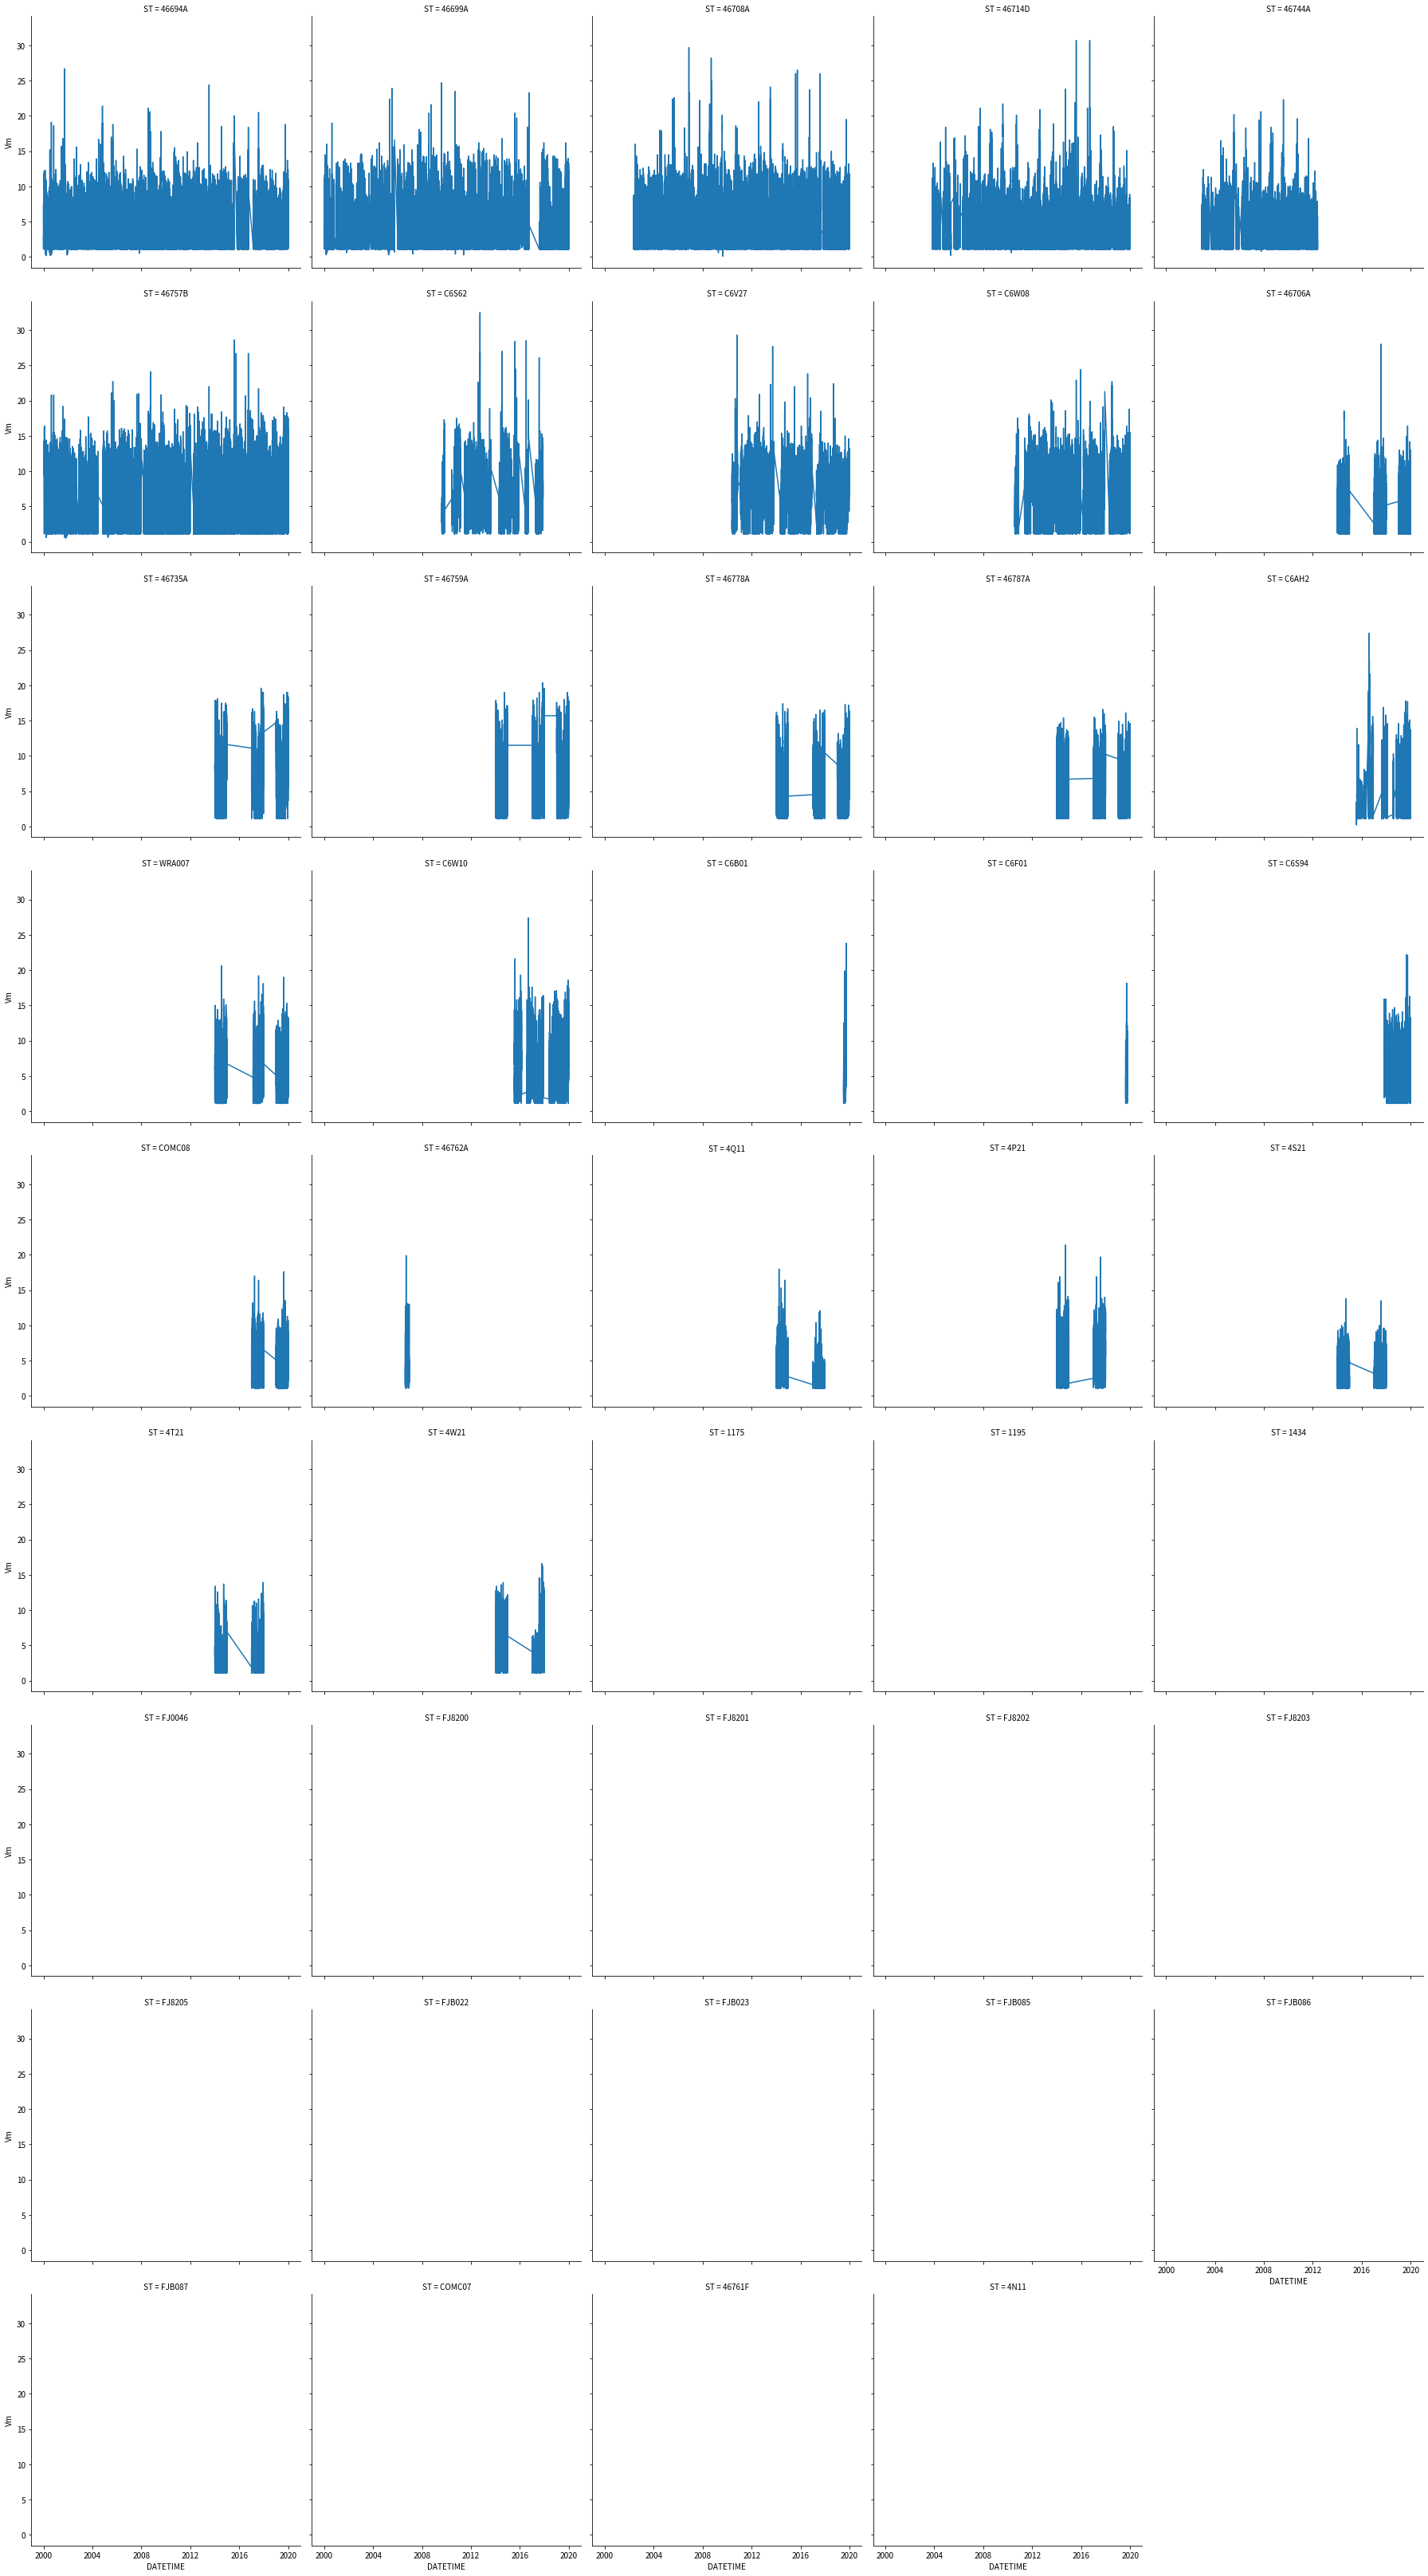

In [36]:
%matplotlib inline
g = sns.FacetGrid(df, col="ST", col_wrap=5, height=5)
g.map(sns.lineplot, 'DATETIME','Vm')
plt.tight_layout()
plt.savefig('MeanWind_time_series.png',dpi=200)

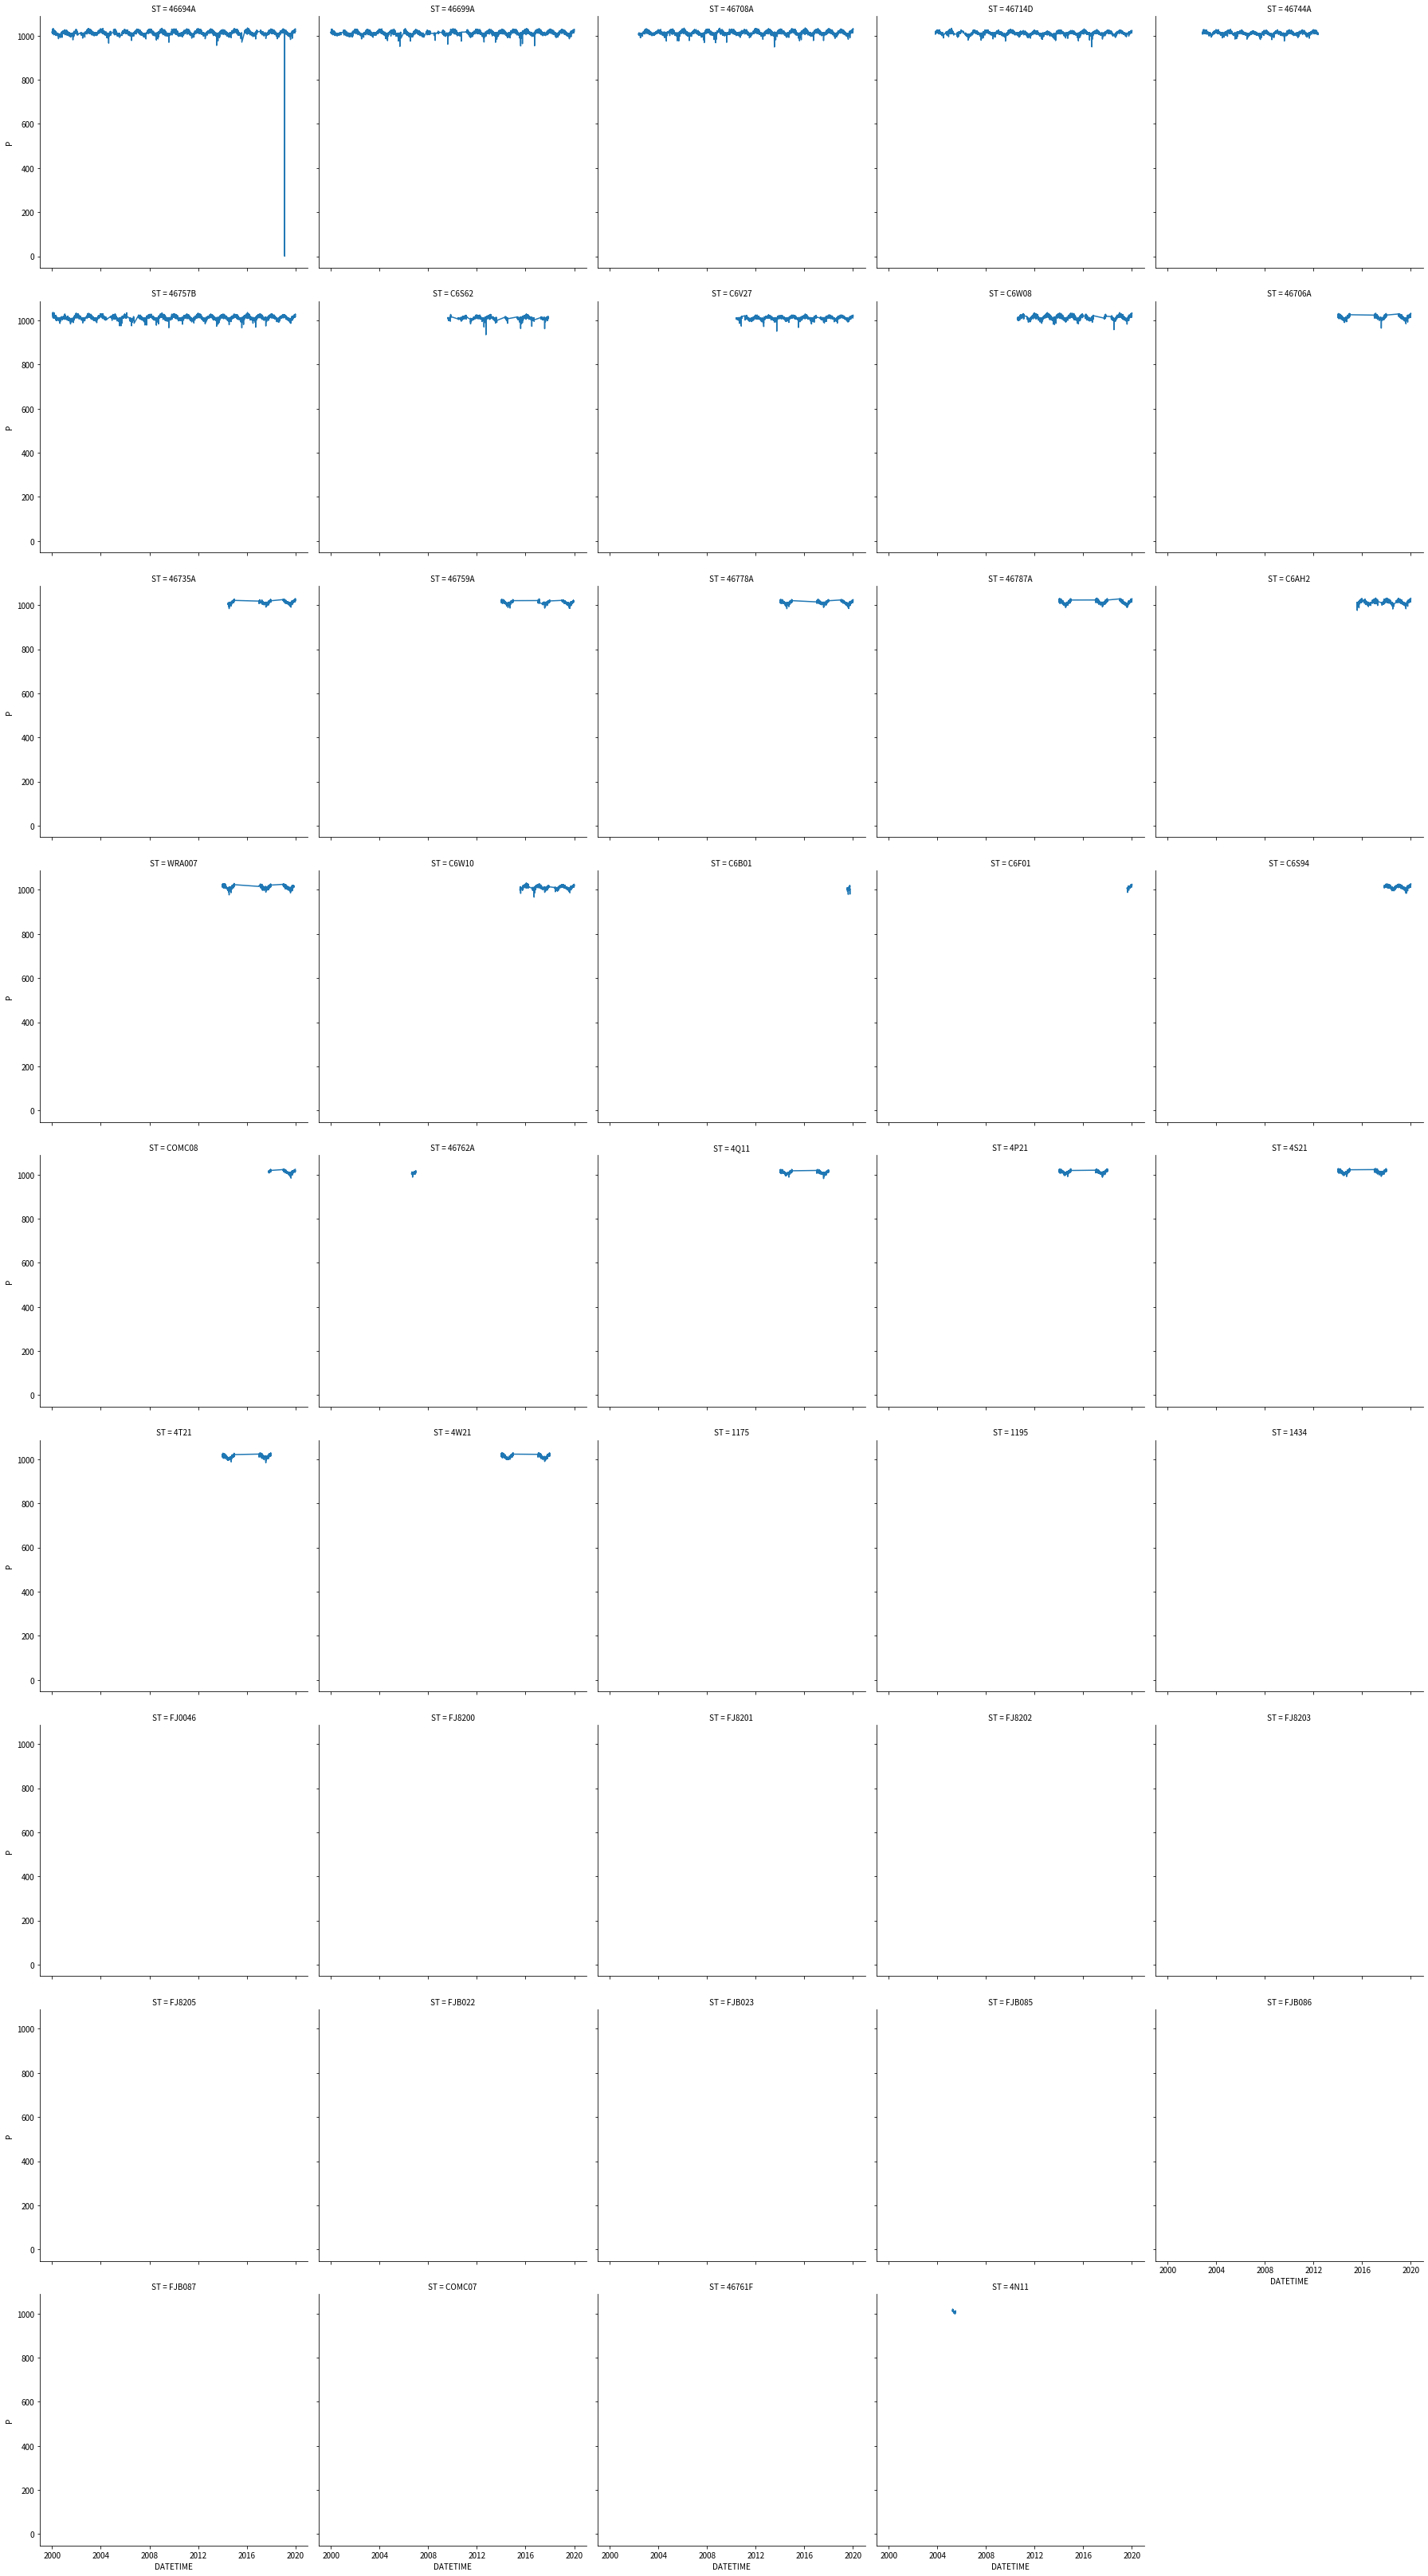

In [37]:
%matplotlib inline
g = sns.FacetGrid(df, col="ST", col_wrap=5, height=5)
g.map(sns.lineplot, 'DATETIME','P')
plt.tight_layout()
plt.savefig('Pressure_time_series.png',dpi=200)

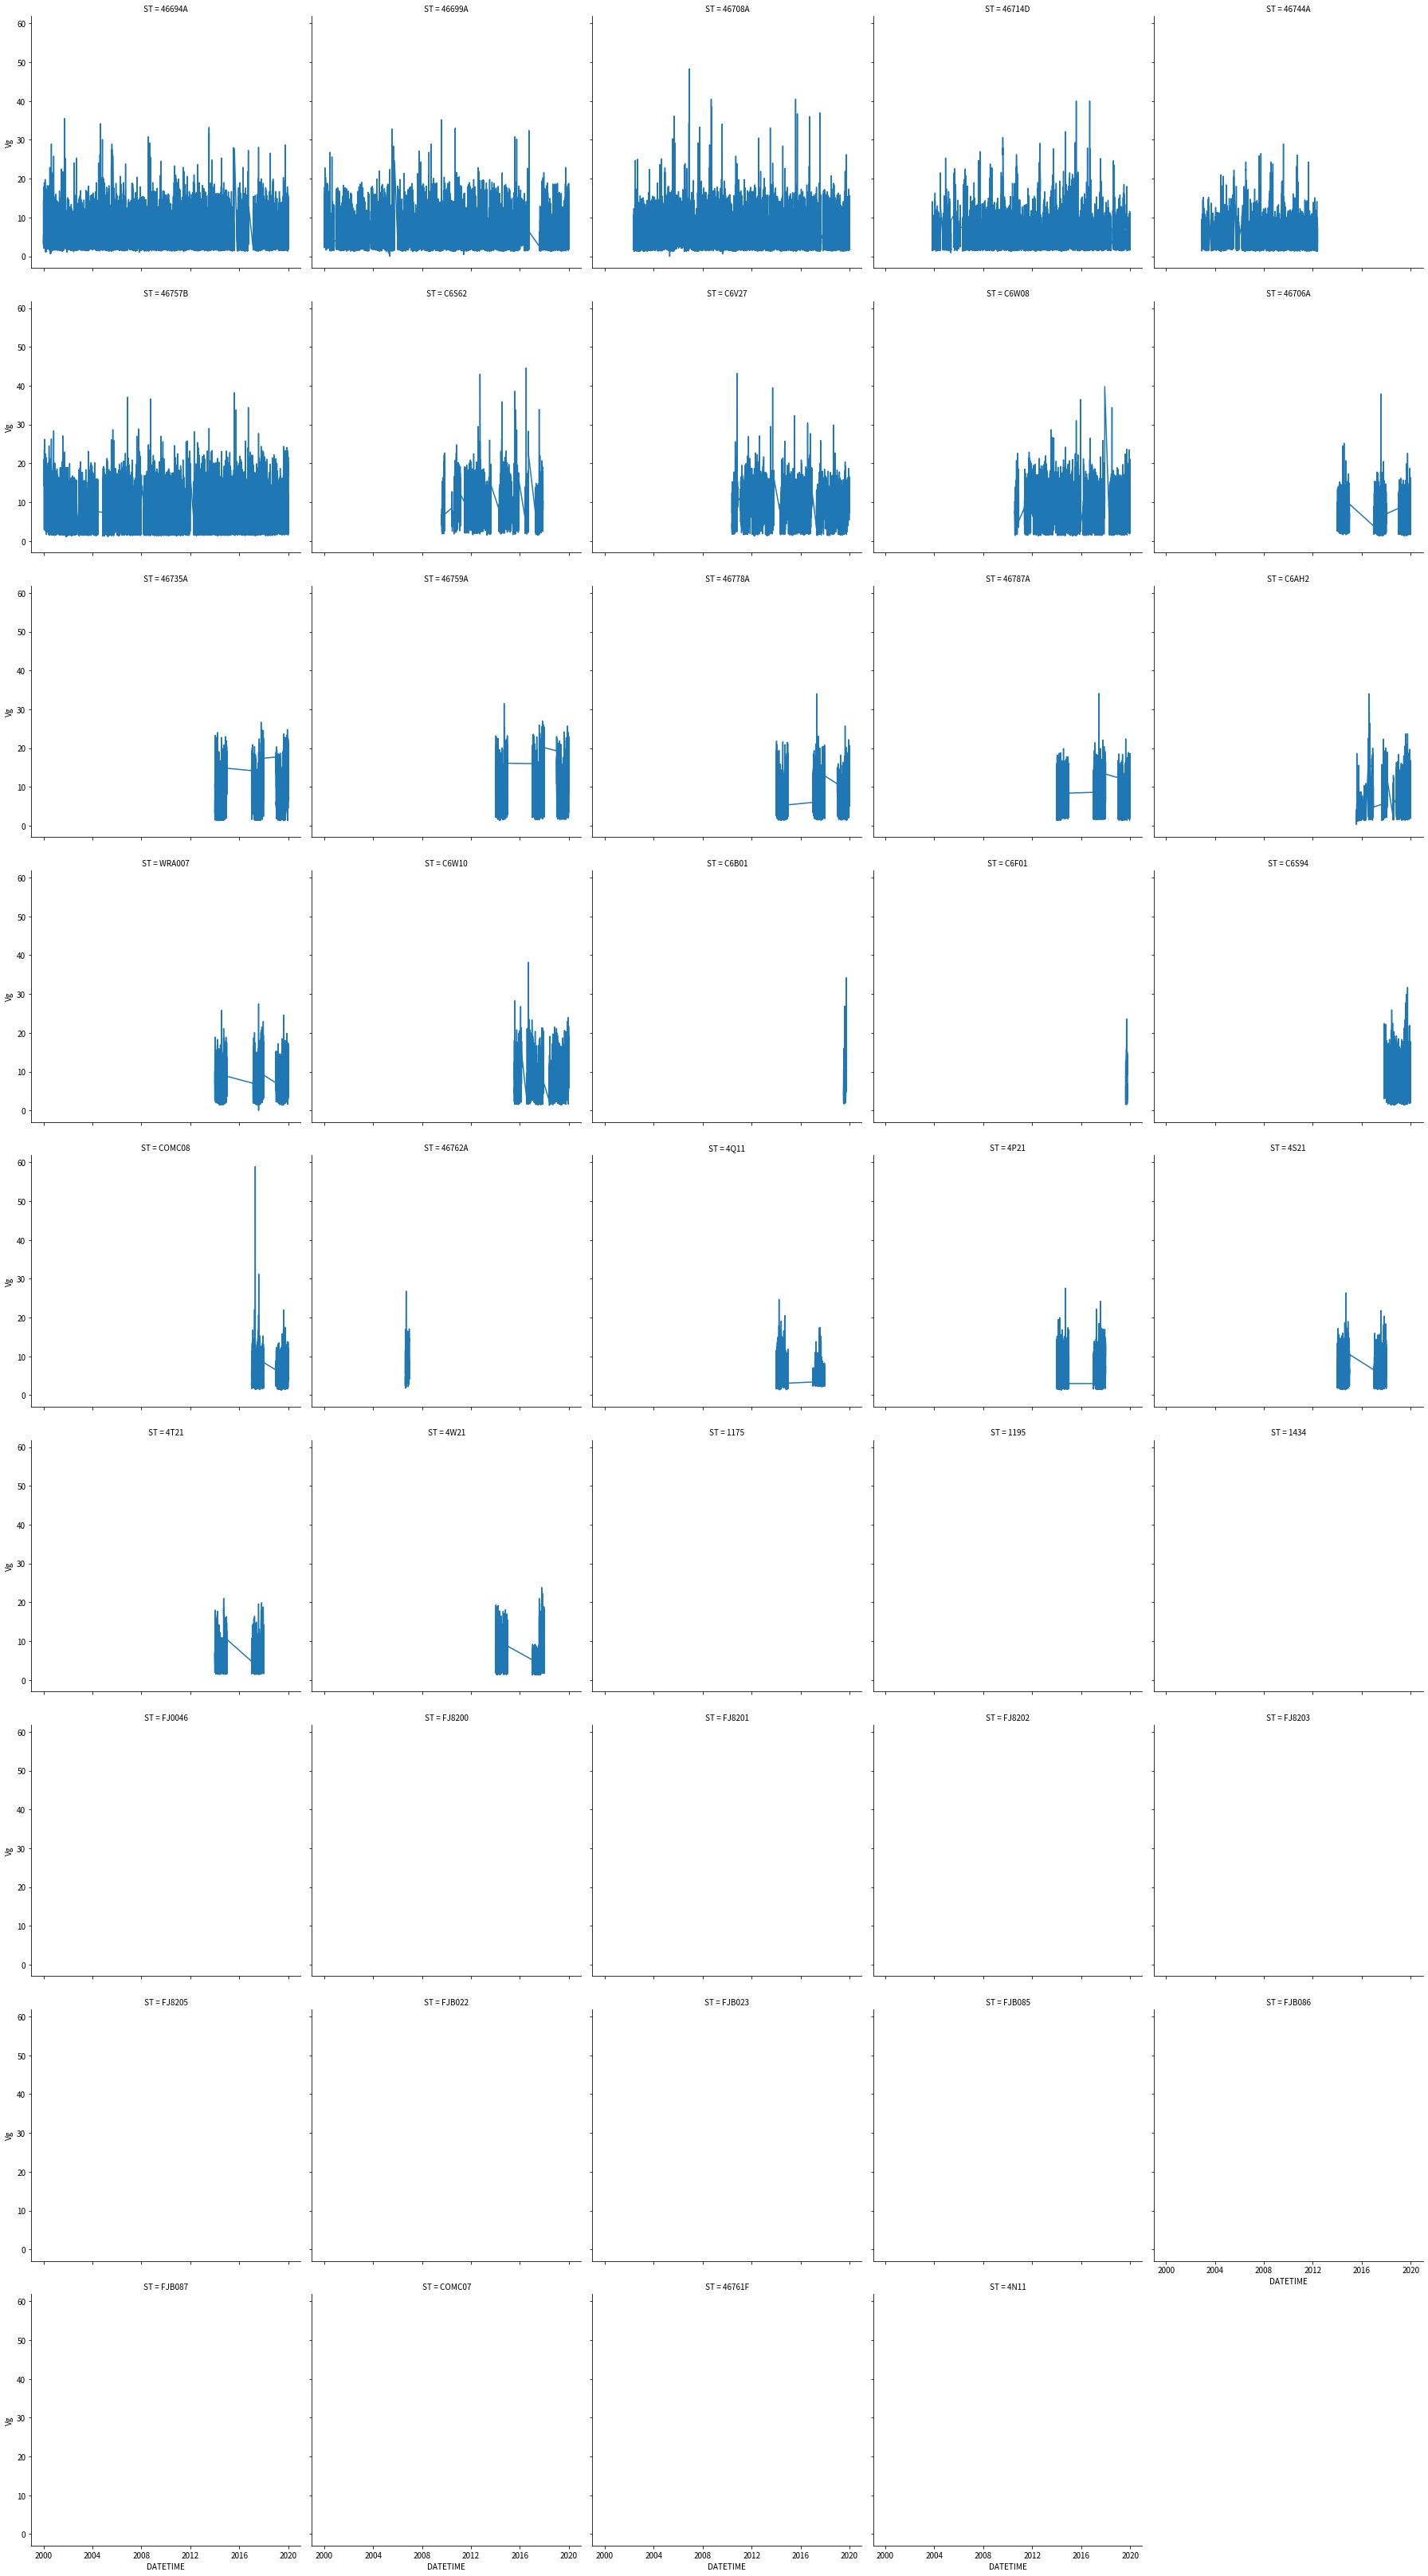

In [38]:
%matplotlib inline
g = sns.FacetGrid(df, col="ST", col_wrap=5, height=5)
g.map(sns.lineplot, 'DATETIME','Vg')
plt.tight_layout()
plt.savefig('GustWind_time_series.png',dpi=200)

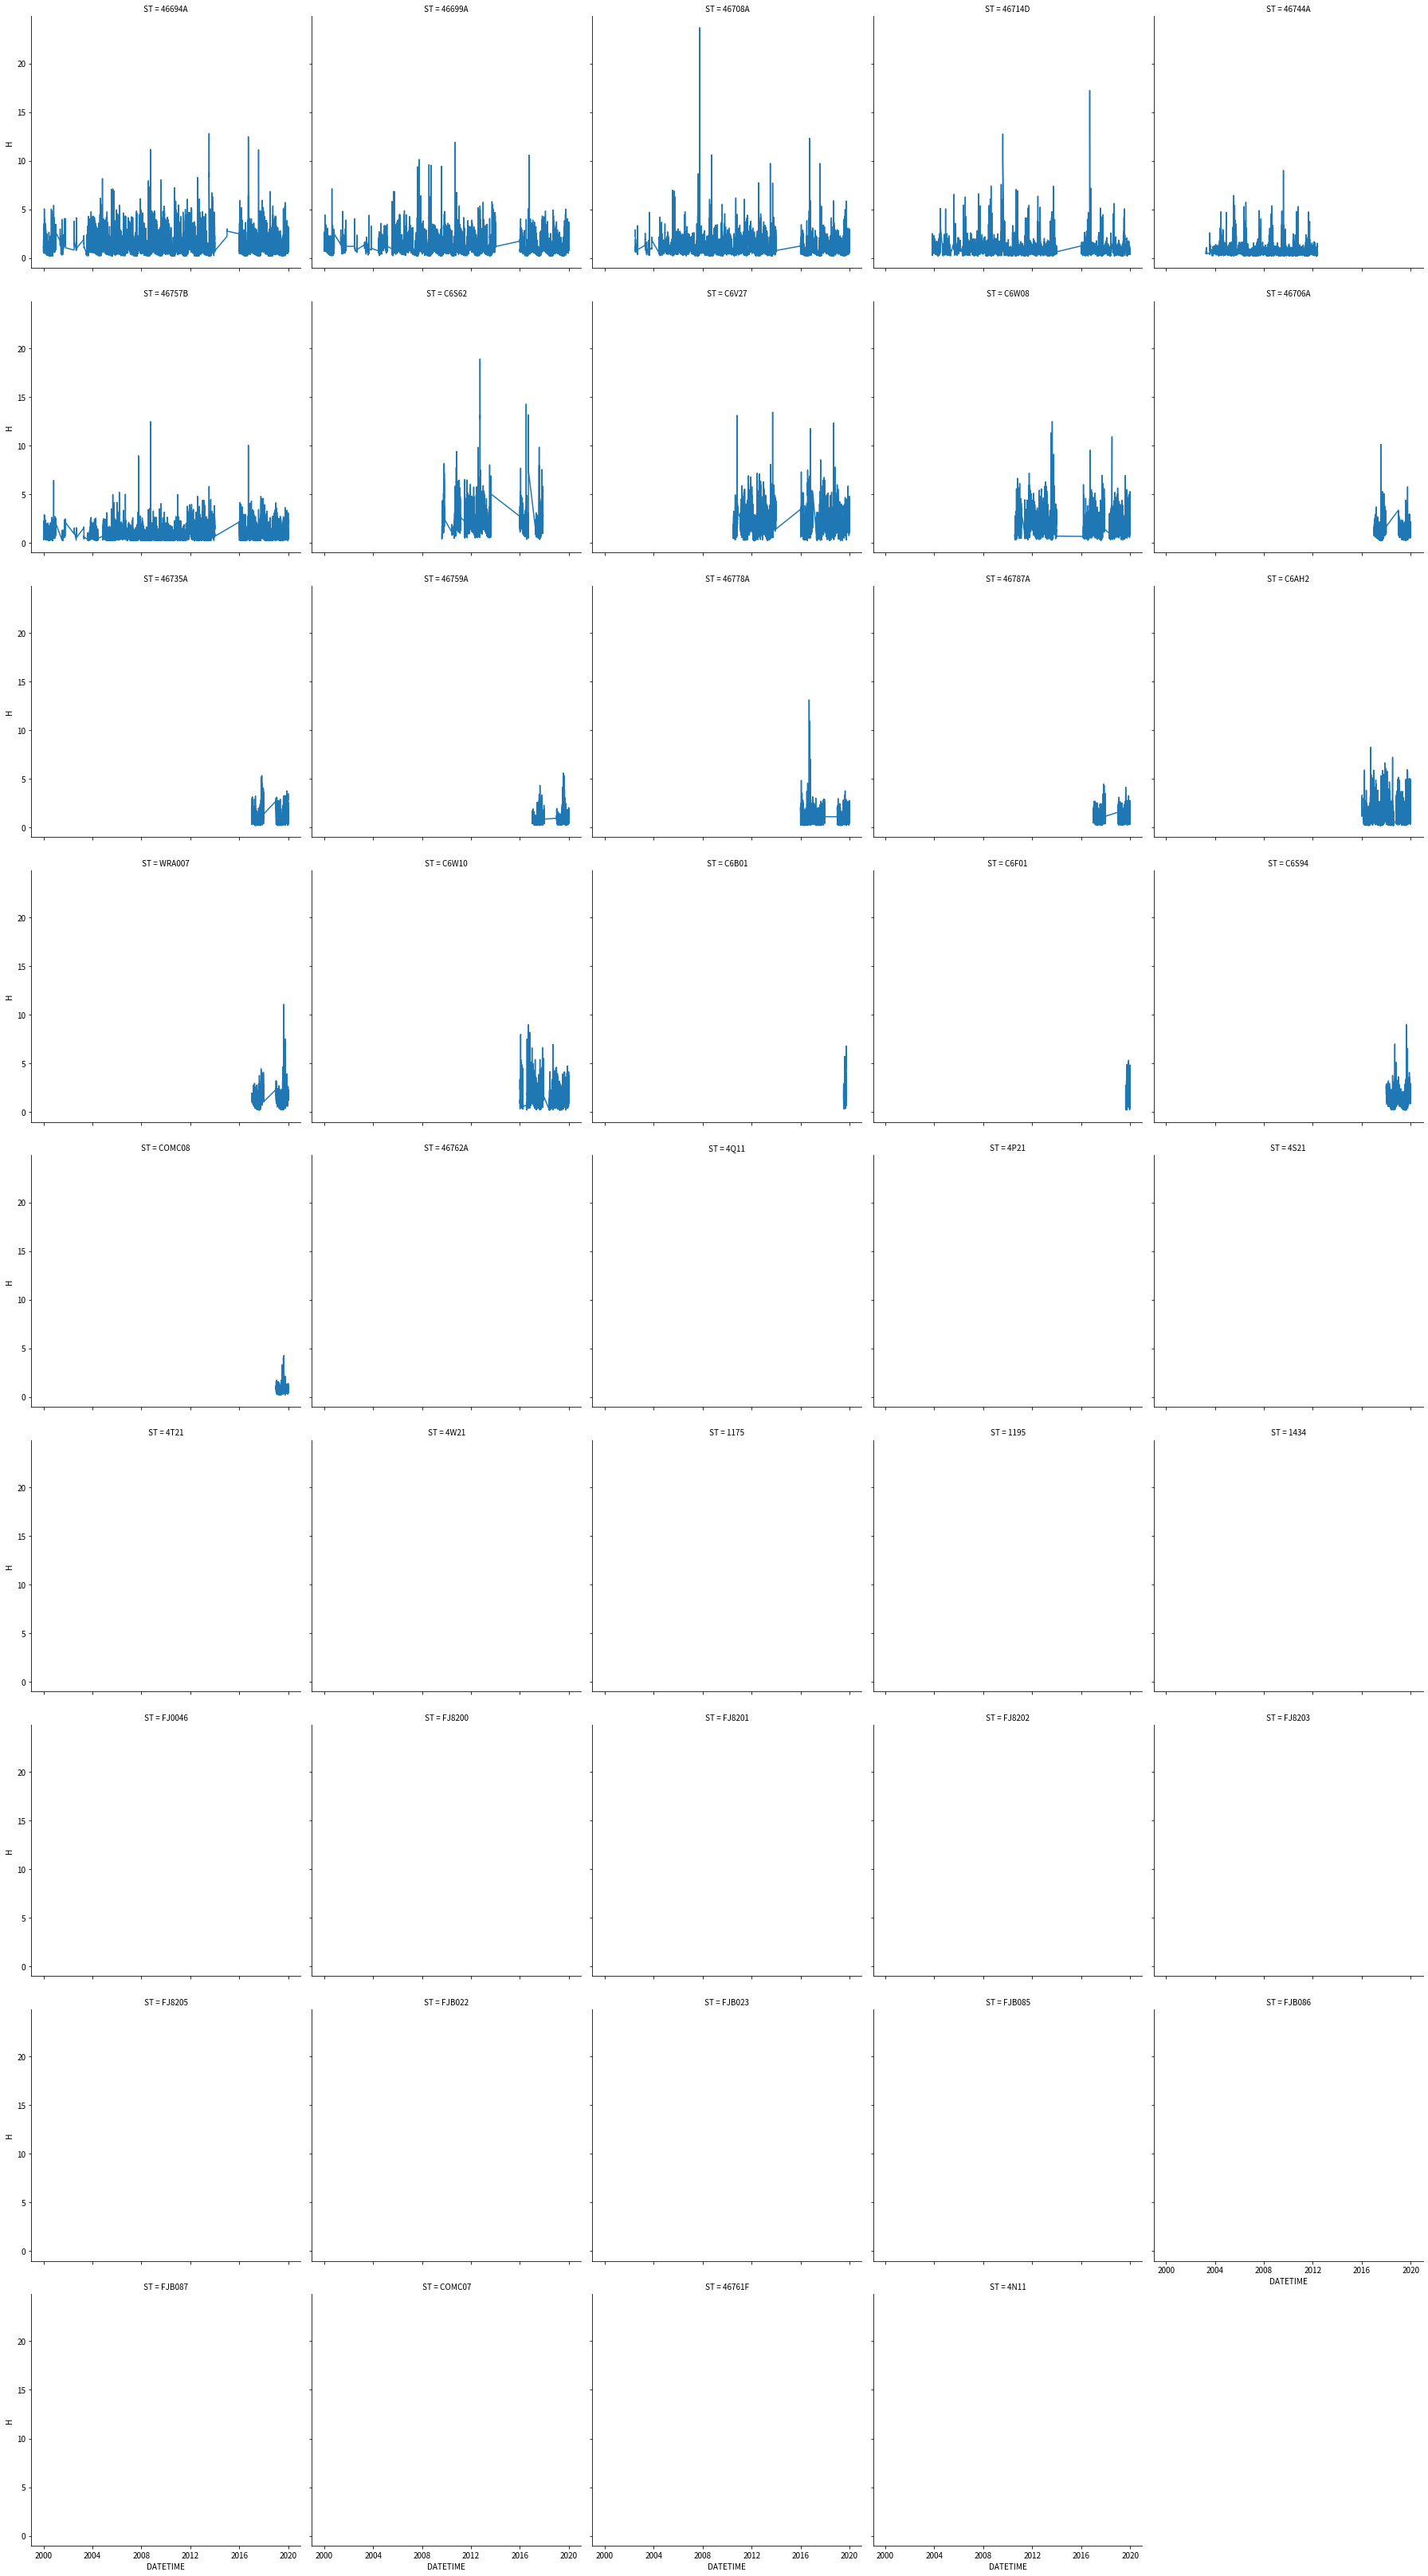

In [39]:
%matplotlib inline
g = sns.FacetGrid(df, col="ST", col_wrap=5, height=5)
g.map(sns.lineplot, 'DATETIME','H')
plt.tight_layout()
plt.savefig('Wave_time_series.png',dpi=200)

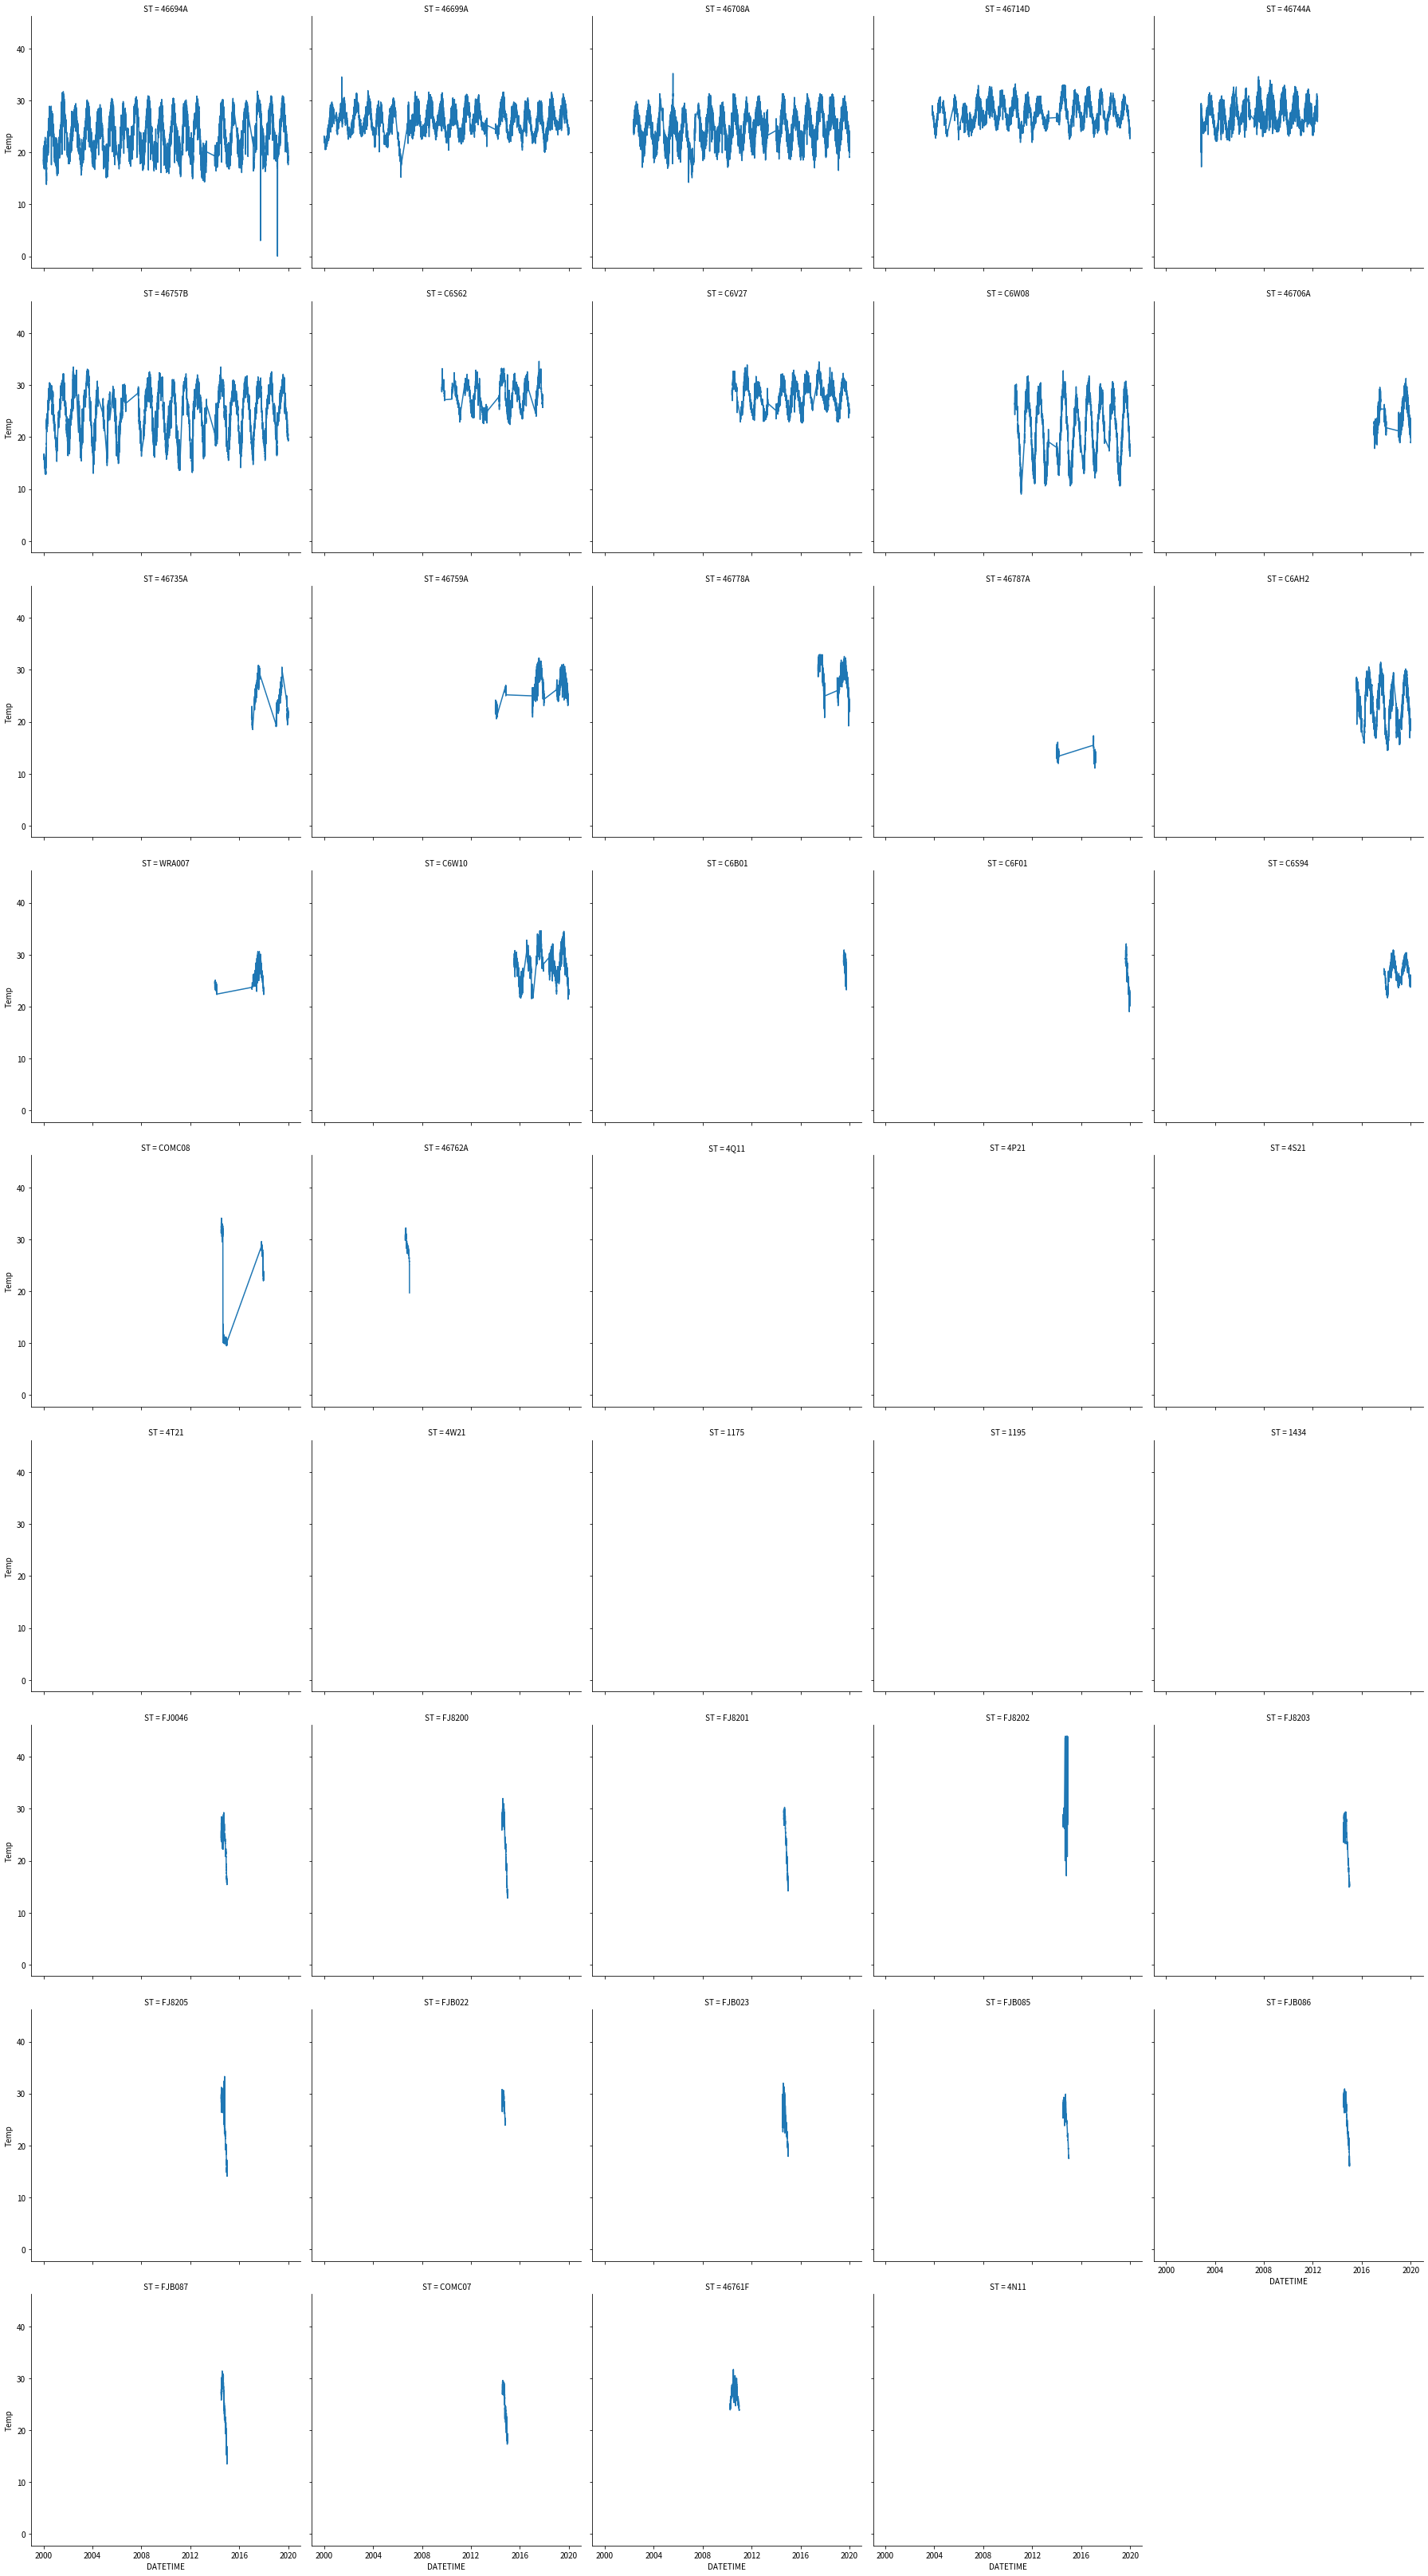

In [40]:
%matplotlib inline
g = sns.FacetGrid(df, col="ST", col_wrap=5, height=5)
g.map(sns.lineplot, 'DATETIME','Temp')
plt.tight_layout()
plt.savefig('Temp_time_series.png',dpi=200)

<Figure size 6400x6400 with 0 Axes>

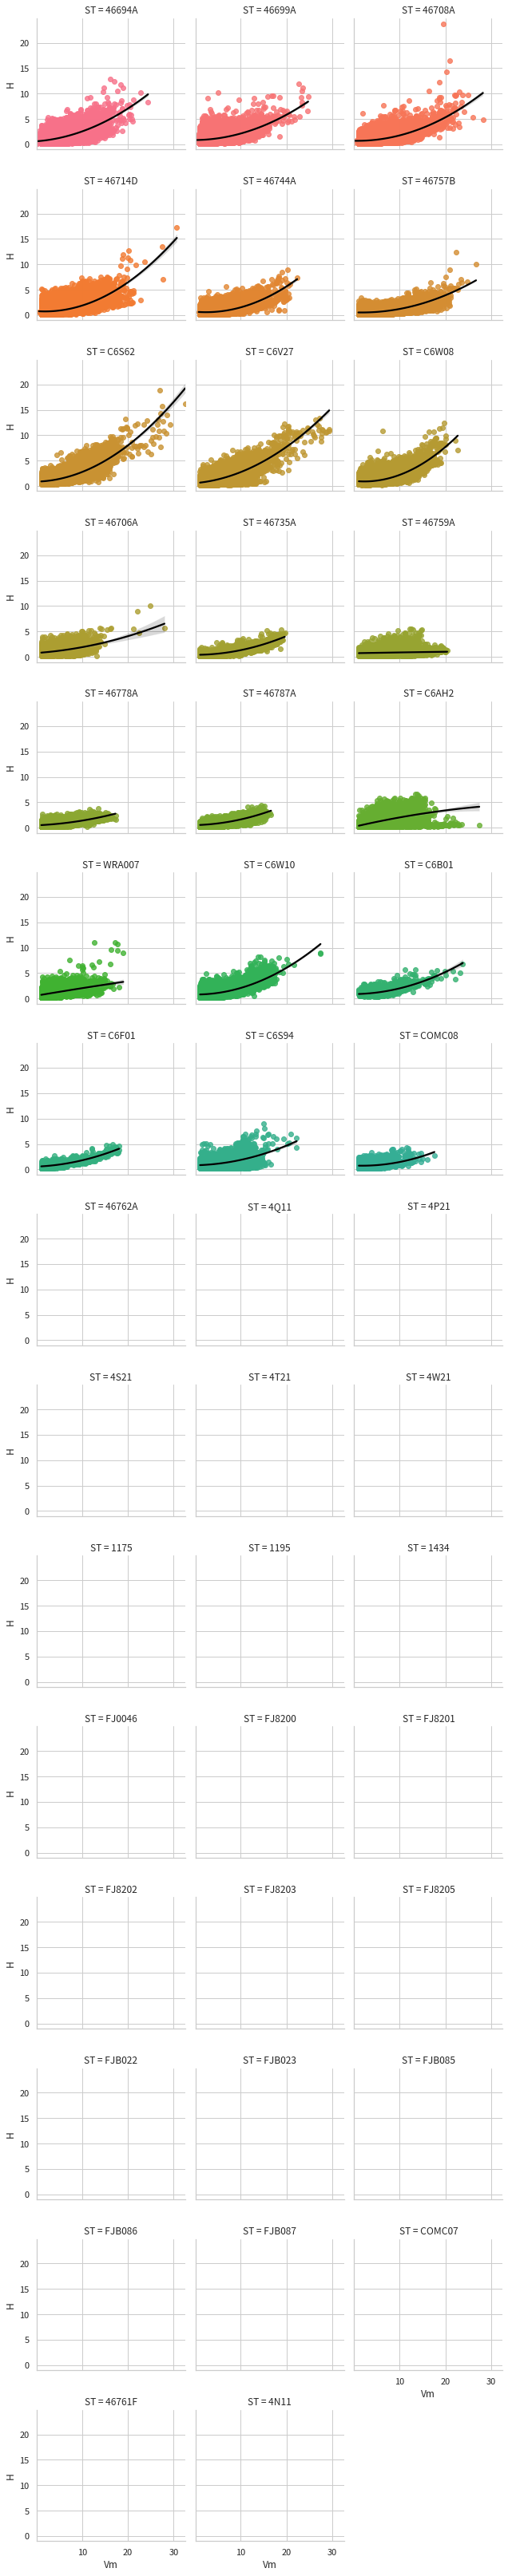

In [41]:
plt.figure(figsize=(32,32),dpi=200)
sns.set_style("whitegrid")
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Taipei Sans TC Beta']})
sns.lmplot(data=df, x="Vm", y="H", col="ST", hue="ST", col_wrap=3, height=3, palette="husl",order=2,line_kws={'color':'black'})
plt.tight_layout()
plt.savefig('Vm_scatter.png',dpi=200)